<a href="https://colab.research.google.com/github/rahulmk8055/AI-vs-Human-Text-Classification/blob/main/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install transformers==4.31.0 datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3

In [2]:
from datasets import load_dataset

ds = load_dataset("Hello-SimpleAI/HC3", "all")

Generating train split:   0%|          | 0/24322 [00:00<?, ? examples/s]

In [3]:
ds.shape

{'train': (24322, 5)}

In [4]:
train_dataset = ds['train']
train_df = train_dataset.to_pandas()
print(train_df.head())

  id                                           question  \
0  0  Why is every book I hear about a " NY Times # ...   
1  1  If salt is so bad for cars , why do we use it ...   
2  2  Why do we still have SD TV channels when HD lo...   
3  3  Why has nobody assassinated Kim Jong - un He i...   
4  4  How was airplane technology able to advance so...   

                                       human_answers  \
0  [Basically there are many categories of " Best...   
1  [salt is good for not dying in car crashes and...   
2  [The way it works is that old TV stations got ...   
3  [You ca n't just go around assassinating the l...   
4  [Wanting to kill the shit out of Germans drive...   

                                     chatgpt_answers       source  
0  [There are many different best seller lists th...  reddit_eli5  
1  [Salt is used on roads to help melt ice and sn...  reddit_eli5  
2  [There are a few reasons why we still have SD ...  reddit_eli5  
3  [It is generally not acceptable o

In [5]:
human_df = train_df[['id', 'human_answers']].rename(columns={'id': 'prompt_id', 'human_answers': 'gen_text'})

chatgpt_df = train_df[['id', 'chatgpt_answers']].rename(columns={'id': 'prompt_id', 'chatgpt_answers': 'gen_text'})

In [6]:
import pandas as pd

human_df['label'] = pd.Series(0, index=human_df.index)
chatgpt_df['label'] = pd.Series(1, index=chatgpt_df.index)

In [7]:
final_df = pd.concat([human_df, chatgpt_df], axis=0)
final_df = final_df.reset_index(drop=True)  # Reset index and drop the old one
print(final_df)

      prompt_id                                           gen_text  label
0             0  [Basically there are many categories of " Best...      0
1             1  [salt is good for not dying in car crashes and...      0
2             2  [The way it works is that old TV stations got ...      0
3             3  [You ca n't just go around assassinating the l...      0
4             4  [Wanting to kill the shit out of Germans drive...      0
...         ...                                                ...    ...
48639     24317  [It's not uncommon for blood pressure to fluct...      1
48640     24318  [There are several possible causes of a painle...      1
48641     24319  [It is not appropriate for me to recommend a s...      1
48642     24320  [It is not uncommon for people with rheumatoid...      1
48643     24321  [It is not uncommon to experience back pain, e...      1

[48644 rows x 3 columns]


In [8]:
counts = final_df.groupby('label').size()
print("Counts:")
print(counts)

Counts:
label
0    24322
1    24322
dtype: int64


In [9]:
final_df.head(10)

,prompt_id,gen_text,label
0,0,"[Basically there are many categories of "" Best...",0
1,1,[salt is good for not dying in car crashes and...,0
2,2,[The way it works is that old TV stations got ...,0
3,3,[You ca n't just go around assassinating the l...,0
4,4,[Wanting to kill the shit out of Germans drive...,0
5,5,[Melanin ! Many of the the first known humans ...,0
6,6,[Because you 're a minor and your parents get ...,0
7,7,[It 's three fold : * Stuff is cheaper to mass...,0
8,8,"[EDIT , Nov 21 : By popular demand , now inclu...",0
9,9,"[Like viruses , they are ( groups of ) molecul...",0


In [10]:
import pandas as pd

def join_all_items(text_list):
    return ' '.join(text_list)  # Join all items into a single string

final_df['text'] = final_df['gen_text'].apply(join_all_items)

print(final_df[['gen_text', 'text']])

                                                gen_text  \
0      [Basically there are many categories of " Best...   
1      [salt is good for not dying in car crashes and...   
2      [The way it works is that old TV stations got ...   
3      [You ca n't just go around assassinating the l...   
4      [Wanting to kill the shit out of Germans drive...   
...                                                  ...   
48639  [It's not uncommon for blood pressure to fluct...   
48640  [There are several possible causes of a painle...   
48641  [It is not appropriate for me to recommend a s...   
48642  [It is not uncommon for people with rheumatoid...   
48643  [It is not uncommon to experience back pain, e...   

                                                    text  
0      Basically there are many categories of " Best ...  
1      salt is good for not dying in car crashes and ...  
2      The way it works is that old TV stations got a...  
3      You ca n't just go around assassinat

In [11]:
final_df.isnull().sum()

prompt_id    0
gen_text     0
label        0
text         0
dtype: int64

In [12]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48644 entries, 0 to 48643
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   prompt_id  48644 non-null  object
 1   gen_text   48644 non-null  object
 2   label      48644 non-null  int64 
 3   text       48644 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


# **Data pre-processing**

## **Data Lowercase**

In [13]:
##dropping duplicates and keeping first records
unique_df = final_df.drop_duplicates(subset=['text'], keep='first')

In [14]:
def to_lowercase(text):
    if isinstance(text, str):
        return text.lower()
    elif isinstance(text, (list, tuple)):
        return ' '.join([to_lowercase(elem) for elem in text])
    else:
        return text

unique_df['text'] = unique_df['text'].apply(to_lowercase)

<ipython-input-14-a21240a32eae>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['text'] = unique_df['text'].apply(to_lowercase)


In [15]:
import re

def remove_punctuation(text):
    # Replace all non-alphanumeric characters with an empty string
    return re.sub(r'[^\w\s]', '', text) if type(text) == str else text

unique_df['text'] = unique_df['text'].apply(remove_punctuation)

<ipython-input-15-2922ddf5de1f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['text'] = unique_df['text'].apply(remove_punctuation)


In [16]:
#df = final_df[['text','label','prompt_id']]
#df.to_csv('outputDataset.csv', index=False)

In [20]:
unique_df.tail()

,prompt_id,gen_text,label,text
48639,24317,[It's not uncommon for blood pressure to fluct...,1,uncommon blood pressure fluctuate throughout d...
48640,24318,[There are several possible causes of a painle...,1,several possible causes painless lump right ar...
48641,24319,[It is not appropriate for me to recommend a s...,1,appropriate recommend specific medication trea...
48642,24320,[It is not uncommon for people with rheumatoid...,1,uncommon people rheumatoid arthritis ra fibrom...
48643,24321,"[It is not uncommon to experience back pain, e...",1,uncommon experience back pain especially stand...


## Dividing data

In [22]:
unique_df.shape

(45749, 4)

In [23]:
import pandas as pd

# Assuming 'unique_df' is your DataFrame and it has columns 'label' and 'text'

# Split the DataFrame based on the label
df_label_0 = unique_df[unique_df['label'] == 0]
df_label_1 = unique_df[unique_df['label'] == 1]

# Sample 7500 rows from each label
df_label_0_sample = df_label_0.sample(n=7500, random_state=1)  # Change random_state for different random samples
df_label_1_sample = df_label_1.sample(n=7500, random_state=1)

# Concatenate both samples to form a new DataFrame
new_df = pd.concat([df_label_0_sample, df_label_1_sample])

# Shuffle the new DataFrame if needed
new_df = new_df.sample(frac=1).reset_index(drop=True)  # This shuffles the rows randomly



In [25]:
new_df.head()

,prompt_id,gen_text,label,text
0,14268,[The Fifth Amendment to the United States Cons...,1,fifth amendment united states constitution pro...
1,16335,[Google is a large technology company that off...,1,google large technology company offers wide ra...
2,12406,[Moderators on Reddit are not required to list...,1,moderators reddit required list reason comment...
3,23936,"[Topiramate, also known as Topamax, is a medic...",1,topiramate also known topamax medication prima...
4,3577,[It varies from campaign to campaign . It also...,0,varies campaign campaign also varies terms rob...


In [26]:
df_to_label1 = new_df.iloc[0:5000]
df_to_label2 = new_df.iloc[5000:10000]
df_to_label3 = new_df.iloc[5000:]

In [ ]:
!pip -q install tqdm

In [ ]:
import torch
from tqdm.auto import tqdm
from transformers import GPT2LMHeadModel, GPT2Tokenizer

model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

def calculate_perplexity(text, tokenizer, model, stride=512, max_length=1024):
    # Ensure the text is truncated to the maximum model length
    encodings = tokenizer(text[:max_length], return_tensors='pt')

    nlls = []
    for i in range(0, encodings.input_ids.size(1), stride):
        begin_loc = max(i + stride - max_length, 0)
        end_loc = min(i + stride, encodings.input_ids.size(1))
        trg_len = end_loc - i
        input_ids = encodings.input_ids[:, begin_loc:end_loc]
        target_ids = input_ids.clone()
        target_ids[:, :-trg_len] = -100

        with torch.no_grad():
            outputs = model(input_ids, labels=target_ids)
            log_likelihood = outputs[0] * trg_len

        nlls.append(log_likelihood)

    ppl = torch.exp(torch.stack(nlls).sum() / encodings.input_ids.size(1))
    return ppl.item()

def calculate_perplexities(df, tokenizer, model):
    # Add a new column for perplexity
    df['Perplexity'] = 0
    for i in tqdm(range(len(df)), desc='Calculating Perplexities'):
        df.at[i, 'Perplexity'] = calculate_perplexity(df['text'].iloc[i], tokenizer, model)
    return df

# **Anuj**

In [ ]:
df_to_label1 = calculate_perplexities(df_to_label1, tokenizer, model)
df_to_label1 = df_to_label1[['text','label','prompt_id']]
df_to_label1.to_csv('AnujoutputDataset.csv', index=False)

# **Ankesh**

In [ ]:
df_to_label2 = calculate_perplexities(df_to_label2, tokenizer, model)
df_to_label2 = df_to_label2[['text','label','prompt_id']]
df_to_label2.to_csv('AnkeshoutputDataset.csv', index=False)

# **Rahul**

In [ ]:
df_to_label3 = calculate_perplexities(df_to_label3, tokenizer, model)
df_to_label3 = df_to_label3[['text','label','prompt_id']]
df_to_label3.to_csv('RahuloutputDataset.csv', index=False)

#Preplexity analysis

- Taking 100-100 AI and Human DS
- use GPT2-based model
- Run analysis on the preplexity vs labels

In [18]:
import pandas as pd

# group by label and sample 100 rows from each group
perpx_df = unique_df.groupby('label').apply(lambda x: x.sample(500))

# reset the index
perpx_df = perpx_df.reset_index(drop=True)

print(perpx_df.head())  # print the first few rows of the new dataset

  prompt_id                                           gen_text  label  \
0      6483  [It 's a way for them to be ' hip ' and ' tren...      0   
1      6919  [They are an enormous company that has a branc...      0   
2     18445  [In machine learning, kernel machines are a cl...      0   
3      3550  [If you consider that petrol ( sorry , British...      0   
4      3371  [Gravity . Every bit of matter attracts every ...      0   

                                                text  
0  it s a way for them to be  hip  and  trendy   ...  
1  they are an enormous company that has a branch...  
2  in machine learning kernel machines are a clas...  
3  if you consider that petrol  sorry  british  i...  
4  gravity  every bit of matter attracts every ot...  


In [19]:
!pip -q install tqdm

In [20]:
import torch
from tqdm.auto import tqdm
from transformers import GPT2LMHeadModel, GPT2Tokenizer

model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

def calculate_perplexity(text, tokenizer, model, stride=512, max_length=1024):
    # Ensure the text is truncated to the maximum model length
    encodings = tokenizer(text[:max_length], return_tensors='pt')

    nlls = []
    for i in range(0, encodings.input_ids.size(1), stride):
        begin_loc = max(i + stride - max_length, 0)
        end_loc = min(i + stride, encodings.input_ids.size(1))
        trg_len = end_loc - i
        input_ids = encodings.input_ids[:, begin_loc:end_loc]
        target_ids = input_ids.clone()
        target_ids[:, :-trg_len] = -100

        with torch.no_grad():
            outputs = model(input_ids, labels=target_ids)
            log_likelihood = outputs[0] * trg_len

        nlls.append(log_likelihood)

    ppl = torch.exp(torch.stack(nlls).sum() / encodings.input_ids.size(1))
    return ppl.item()

def calculate_perplexities(df, tokenizer, model):
    # Add a new column for perplexity
    df['Perplexity'] = 0
    for i in tqdm(range(len(df)), desc='Calculating Perplexities'):
        df.at[i, 'Perplexity'] = calculate_perplexity(df['text'].iloc[i], tokenizer, model)
    return df

# Assuming `unique_df` is your DataFrame with the texts
perpx_df = calculate_perplexities(perpx_df, tokenizer, model)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Calculating Perplexities:   0%|          | 0/1000 [00:00<?, ?it/s]

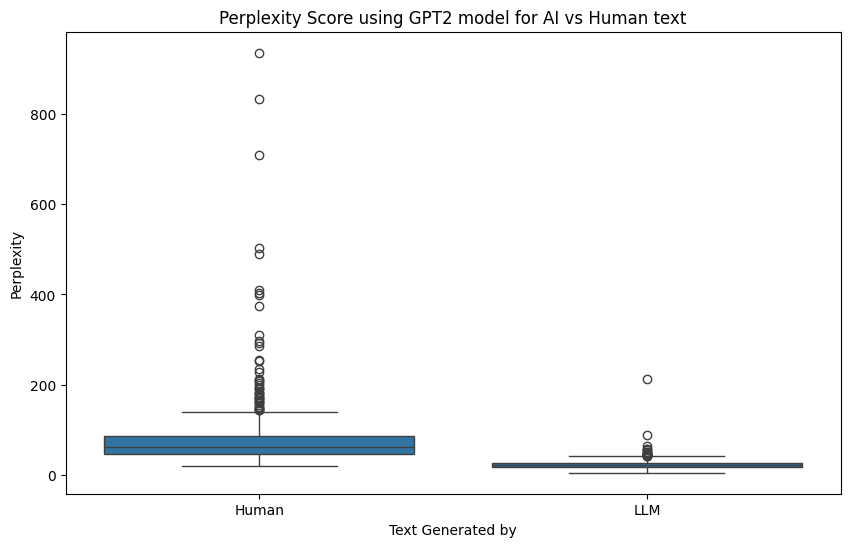

In [23]:
df1 = perpx_df[perpx_df['label']==0]
df2 = perpx_df[perpx_df['label']==1]

import seaborn as sns
import matplotlib.pyplot as plt

# Create a combined DataFrame for Seaborn
combined_df = pd.concat([df1, df2])

# Map labels to the desired names
label_mapping = {0: 'Human', 1: 'LLM'}
combined_df['Text Generated by'] = combined_df['label'].map(label_mapping)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Text Generated by', y='Perplexity', data=combined_df)
plt.title('Perplexity Score using GPT2 model for AI vs Human text')
plt.xlabel('Text Generated by')
plt.ylabel('Perplexity')

plt.show()


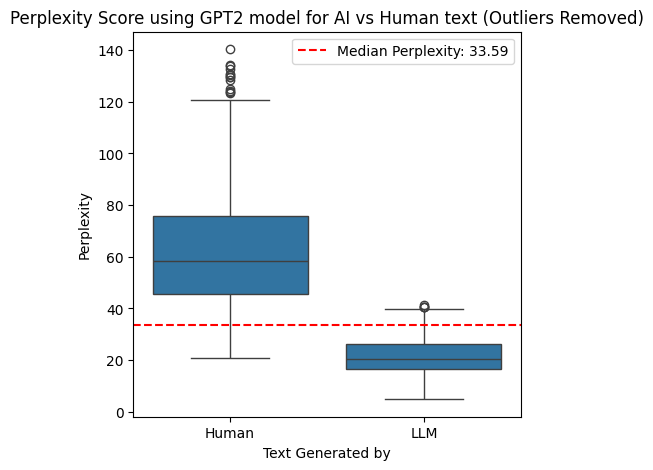

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

df1 = perpx_df[perpx_df['label']==0]
df2 = perpx_df[perpx_df['label']==1]

# Calculate IQR and filter out the outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df1_no_outliers = remove_outliers(df1, 'Perplexity')
df2_no_outliers = remove_outliers(df2, 'Perplexity')

# Create a combined DataFrame for Seaborn
combined_no_outliers_df = pd.concat([df1_no_outliers, df2_no_outliers])

# Map labels to the desired names
combined_no_outliers_df['Text Generated by'] = combined_no_outliers_df['label'].map(label_mapping)

# Calculate the median perplexity score after removing outliers
median_perplexity_no_outliers = combined_no_outliers_df['Perplexity'].median()

# Plot using Seaborn
plt.figure(figsize=(5, 5))
sns.boxplot(x='Text Generated by', y='Perplexity', data=combined_no_outliers_df)
plt.axhline(median_perplexity_no_outliers, color='red', linestyle='--', label=f'Median Perplexity: {median_perplexity_no_outliers:.2f}')
plt.title('Perplexity Score using GPT2 model for AI vs Human text (Outliers Removed)')
plt.xlabel('Text Generated by')
plt.ylabel('Perplexity')
plt.legend()

plt.show()


# **Brustiness Analysis**

In [27]:
import numpy as np
!pip -q install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
def calculate_burstiness(text):
    tokens = nltk.word_tokenize(text)
    if not tokens:
        return 0
    lengths = [len(token) for token in tokens]
    mean_length = np.mean(lengths)
    std_dev_length = np.std(lengths)
    burstiness = std_dev_length / mean_length if mean_length > 0 else 0
    return burstiness


perpx_df.loc[:, 'Burstiness'] = perpx_df['text'].apply(lambda x: calculate_burstiness(x) if isinstance(x, str) else 0)

# Display the DataFrame to check the result
print(perpx_df)

    prompt_id                                           gen_text  label  \
0        6483  [It 's a way for them to be ' hip ' and ' tren...      0   
1        6919  [They are an enormous company that has a branc...      0   
2       18445  [In machine learning, kernel machines are a cl...      0   
3        3550  [If you consider that petrol ( sorry , British...      0   
4        3371  [Gravity . Every bit of matter attracts every ...      0   
..        ...                                                ...    ...   
995     24241  [It's difficult to diagnose a condition withou...      1   
996      8177  [Washington, D.C., is the capital city of the ...      1   
997     21353  [In the context of financial investments, "hea...      1   
998       443  [Cuddling with animals can be a way for people...      1   
999     22329  [Mortgage payments are typically made on a mon...      1   

                                                  text  Perplexity  Burstiness  
0    it s a way fo

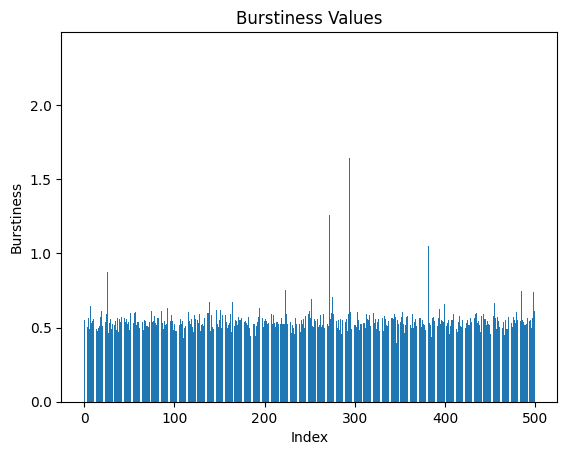

In [29]:
df1 = perpx_df[perpx_df['label']==0]
df2 = perpx_df[perpx_df['label']==1]

# assume you have a list of burstiness values
burstiness_values = df1['Burstiness']

# create a bar plot
plt.bar(range(len(burstiness_values)), burstiness_values)

# set the title and labels
plt.title('Burstiness Values')
plt.xlabel('Index')
plt.ylabel('Burstiness')

# show the plot
plt.show()

# **Readability scores**

In [30]:
!pip -q install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.4 MB/s eta 0:00:00


In [31]:
import pandas as pd
import textstat

# Function to calculate readability scores
def calculate_readability_scores(text):
    scores = {
        'flesch_reading_ease': textstat.flesch_reading_ease(text),
        'smog_index': textstat.smog_index(text),
        'flesch_kincaid_grade': textstat.flesch_kincaid_grade(text),
        'coleman_liau_index': textstat.coleman_liau_index(text),
        'automated_readability_index': textstat.automated_readability_index(text),
        'dale_chall_readability_score': textstat.dale_chall_readability_score(text),
        'difficult_words': textstat.difficult_words(text),
        'linsear_write_formula': textstat.linsear_write_formula(text),
        'gunning_fog': textstat.gunning_fog(text),
        'text_standard': textstat.text_standard(text)
    }
    return scores

# Apply the readability scores function to the DataFrame
readability_scores = perpx_df['text'].apply(calculate_readability_scores)

# Convert the scores into a DataFrame and concatenate with the original DataFrame
readability_df = readability_scores.apply(pd.Series)
perpx_df = pd.concat([perpx_df, readability_df], axis=1)

# Display the DataFrame
print(perpx_df)


    prompt_id                                           gen_text  label  \
0        6483  [It 's a way for them to be ' hip ' and ' tren...      0   
1        6919  [They are an enormous company that has a branc...      0   
2       18445  [In machine learning, kernel machines are a cl...      0   
3        3550  [If you consider that petrol ( sorry , British...      0   
4        3371  [Gravity . Every bit of matter attracts every ...      0   
..        ...                                                ...    ...   
995     24241  [It's difficult to diagnose a condition withou...      1   
996      8177  [Washington, D.C., is the capital city of the ...      1   
997     21353  [In the context of financial investments, "hea...      1   
998       443  [Cuddling with animals can be a way for people...      1   
999     22329  [Mortgage payments are typically made on a mon...      1   

                                                  text  Perplexity  \
0    it s a way for them to b

In [32]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag, ne_chunk
from nltk.tree import Tree

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Function to calculate syntactic complexity metrics
def calculate_syntactic_complexity(text):
    sentences = sent_tokenize(text)
    num_sentences = len(sentences)
    words = word_tokenize(text)
    num_words = len(words)
    avg_sentence_length = num_words / num_sentences if num_sentences > 0 else 0

    num_clauses = 0
    for sentence in sentences:
        chunks = ne_chunk(pos_tag(word_tokenize(sentence)))
        num_clauses += sum(1 for chunk in chunks if isinstance(chunk, Tree))

    avg_clauses_per_sentence = num_clauses / num_sentences if num_sentences > 0 else 0

    return {
        'avg_sentence_length': avg_sentence_length,
        'avg_clauses_per_sentence': avg_clauses_per_sentence
    }

# Apply the syntactic complexity function to the DataFrame
syntactic_complexity_scores = perpx_df['text'].apply(calculate_syntactic_complexity)

# Convert the scores into a DataFrame and concatenate with the original DataFrame
syntactic_complexity_df = syntactic_complexity_scores.apply(pd.Series)
perpx_df = pd.concat([perpx_df, syntactic_complexity_df], axis=1)

# Display the DataFrame
print(perpx_df)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


    prompt_id                                           gen_text  label  \
0        6483  [It 's a way for them to be ' hip ' and ' tren...      0   
1        6919  [They are an enormous company that has a branc...      0   
2       18445  [In machine learning, kernel machines are a cl...      0   
3        3550  [If you consider that petrol ( sorry , British...      0   
4        3371  [Gravity . Every bit of matter attracts every ...      0   
..        ...                                                ...    ...   
995     24241  [It's difficult to diagnose a condition withou...      1   
996      8177  [Washington, D.C., is the capital city of the ...      1   
997     21353  [In the context of financial investments, "hea...      1   
998       443  [Cuddling with animals can be a way for people...      1   
999     22329  [Mortgage payments are typically made on a mon...      1   

                                                  text  Perplexity  \
0    it s a way for them to b

In [33]:
perpx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   prompt_id                     1000 non-null   object 
 1   gen_text                      1000 non-null   object 
 2   label                         1000 non-null   int64  
 3   text                          1000 non-null   object 
 4   Perplexity                    1000 non-null   float64
 5   Burstiness                    1000 non-null   float64
 6   flesch_reading_ease           1000 non-null   float64
 7   smog_index                    1000 non-null   float64
 8   flesch_kincaid_grade          1000 non-null   float64
 9   coleman_liau_index            1000 non-null   float64
 10  automated_readability_index   1000 non-null   float64
 11  dale_chall_readability_score  1000 non-null   float64
 12  difficult_words               1000 non-null   int64  
 13  lins

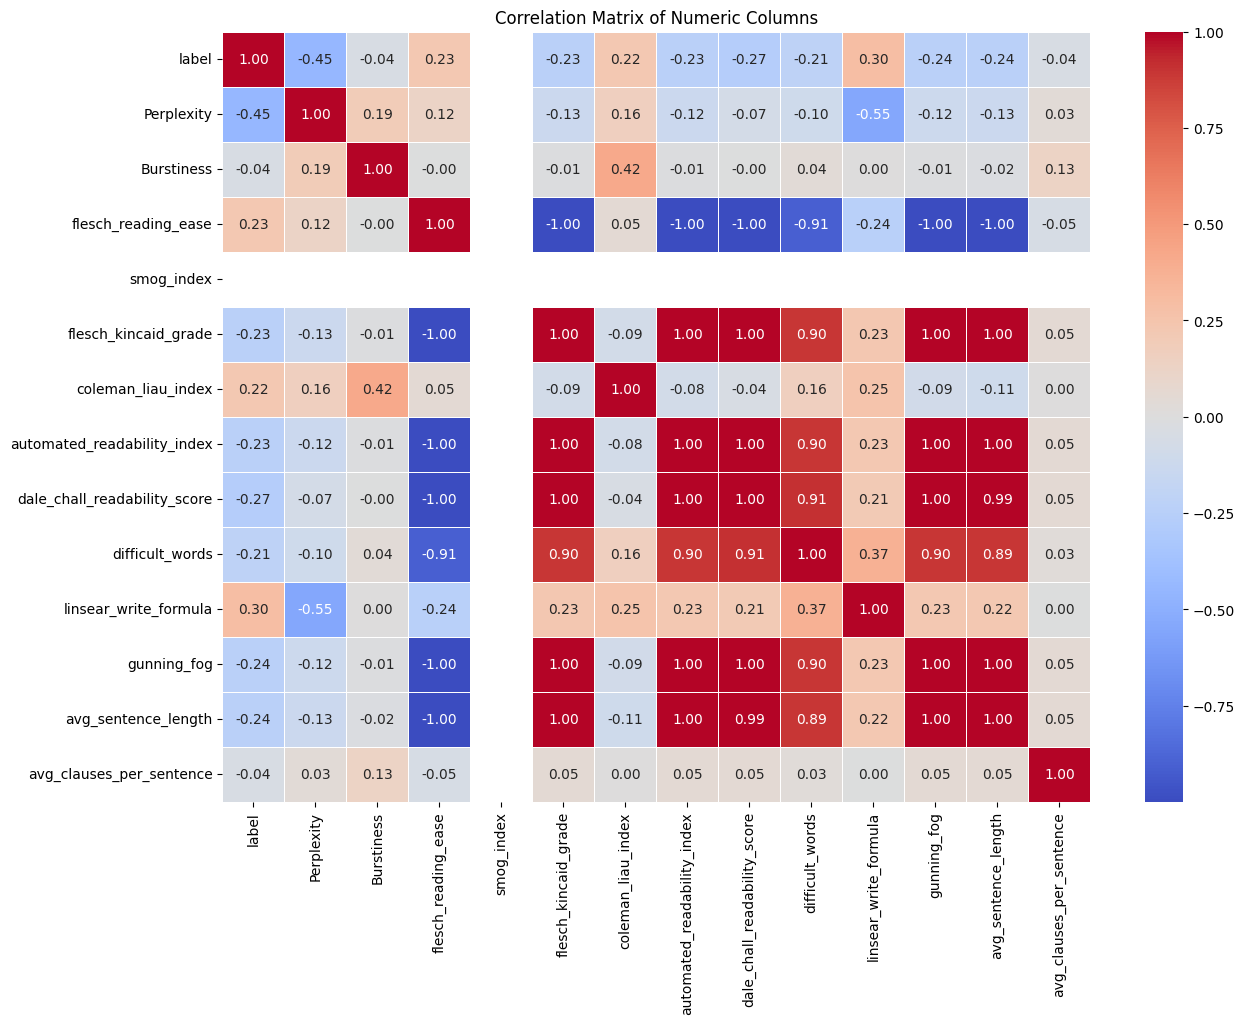

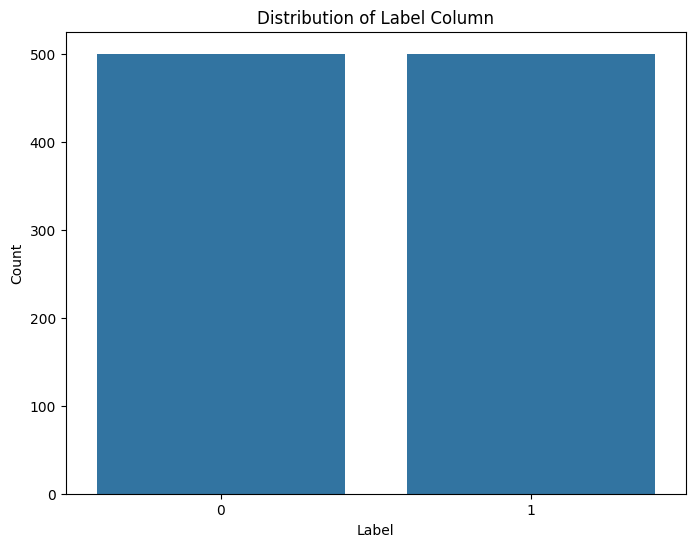

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Calculate the correlation matrix
numeric_columns = perpx_df.select_dtypes(include=[float, int]).columns
correlation_matrix = perpx_df[numeric_columns].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

# Plot the distribution of the label column
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=perpx_df)
plt.title('Distribution of Label Column')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [35]:
perpx_df.describe()

,label,Perplexity,Burstiness,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,avg_sentence_length,avg_clauses_per_sentence
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.50000,52.414245,0.551344,-164.083780,0.0,96.669600,10.760860,122.100900,19.170780,35.662000,58.921000,100.531300,243.634000,0.003000
std,0.50025,65.591434,0.105567,204.377779,0.0,78.730075,2.639149,100.852775,9.798864,25.320444,10.553987,80.651642,202.310582,0.070682
min,0.00000,4.895107,0.349203,-1880.710000,0.0,5.200000,5.070000,6.500000,6.160000,1.000000,7.000000,8.460000,12.000000,0.000000
25%,0.00000,20.922046,0.514560,-189.380000,0.0,55.900000,9.020000,69.875000,14.100000,20.000000,56.000000,58.950000,140.000000,0.000000
50%,0.50000,36.427504,0.543151,-113.430000,0.0,76.600000,10.420000,96.850000,16.495000,30.000000,60.000000,80.205000,193.500000,0.000000
75%,1.00000,61.165348,0.571344,-54.977500,0.0,105.900000,12.090000,133.625000,20.260000,43.000000,64.000000,110.182500,268.000000,0.000000
max,1.00000,935.673096,2.372121,82.650000,0.0,757.500000,43.460000,969.300000,102.600000,207.000000,82.000000,777.920000,1940.000000,2.000000


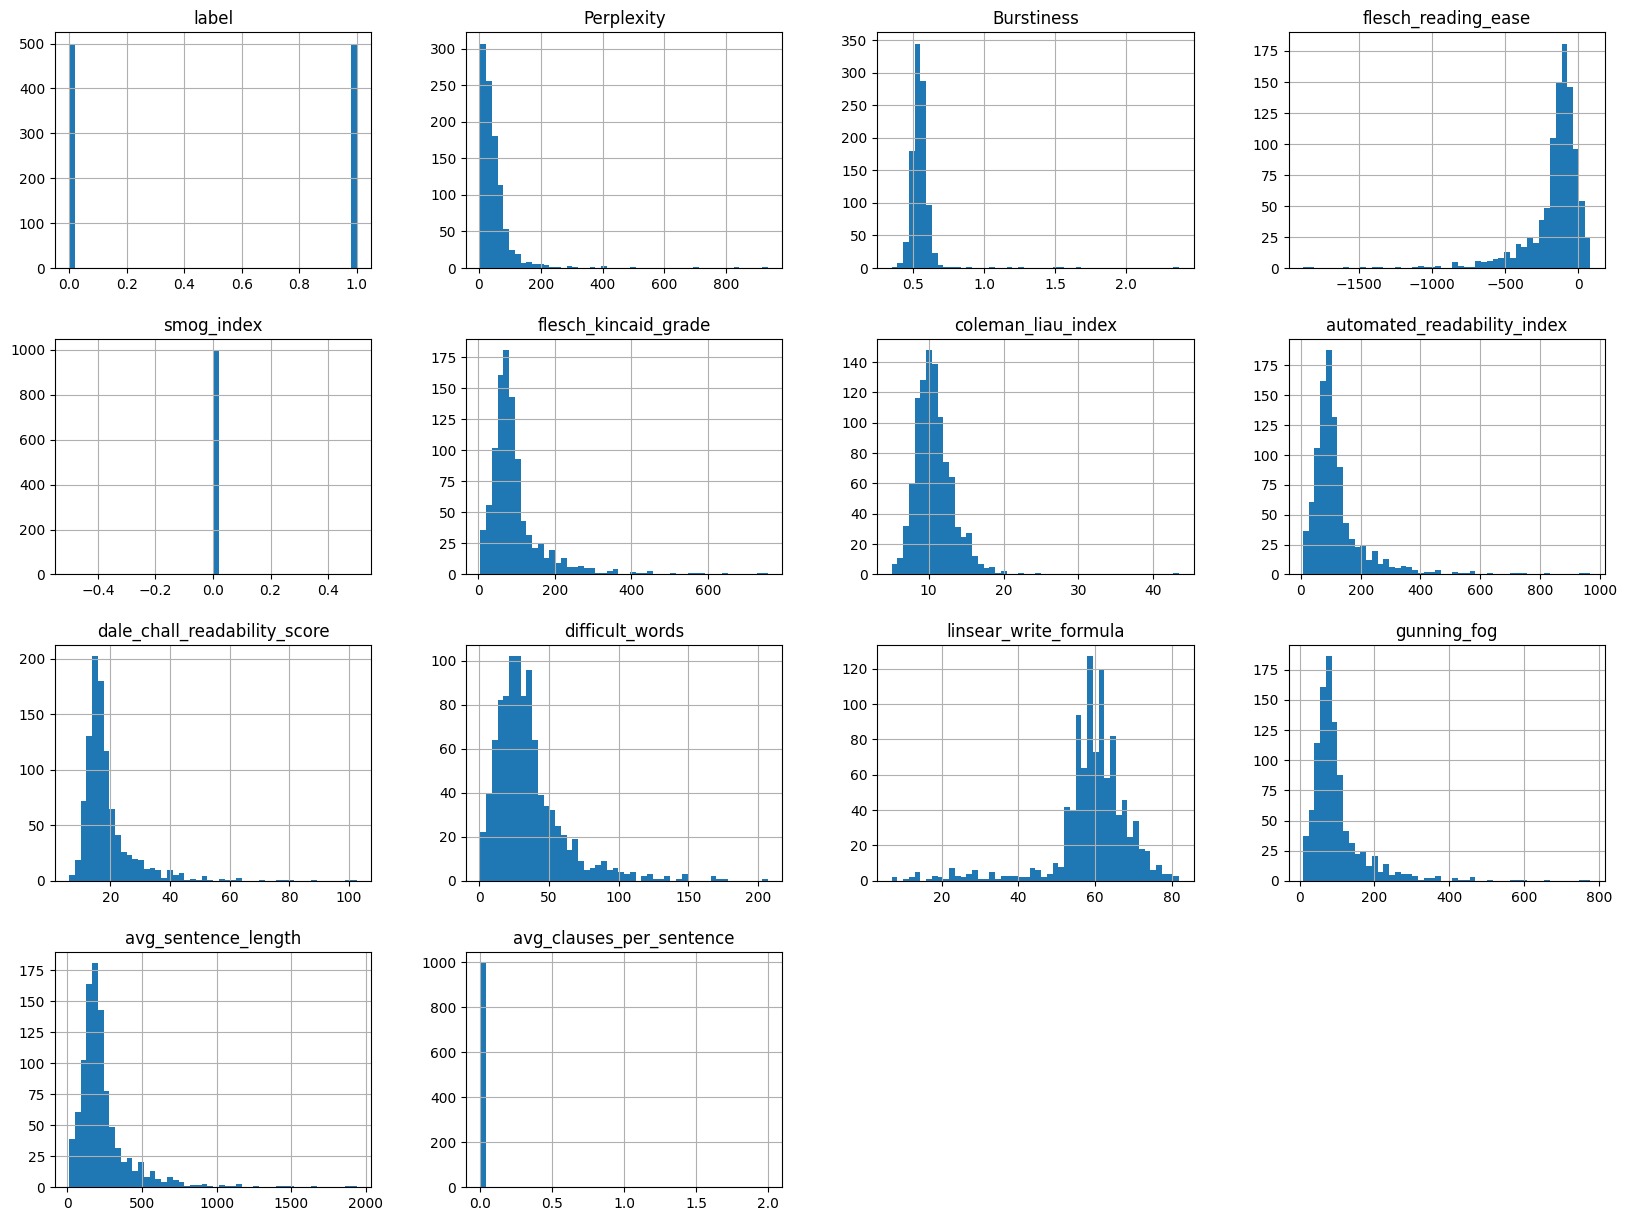

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
perpx_df.hist(bins=50, figsize=(20,15))
plt.show()

Correlation Matrix:
label                           1.000000
linsear_write_formula           0.296150
flesch_reading_ease             0.226256
coleman_liau_index              0.223130
Burstiness                     -0.038730
avg_clauses_per_sentence       -0.042465
difficult_words                -0.211635
flesch_kincaid_grade           -0.234089
automated_readability_index    -0.234384
avg_sentence_length            -0.238298
gunning_fog                    -0.238325
dale_chall_readability_score   -0.270889
Perplexity                     -0.445424
smog_index                           NaN
Name: label, dtype: float64


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


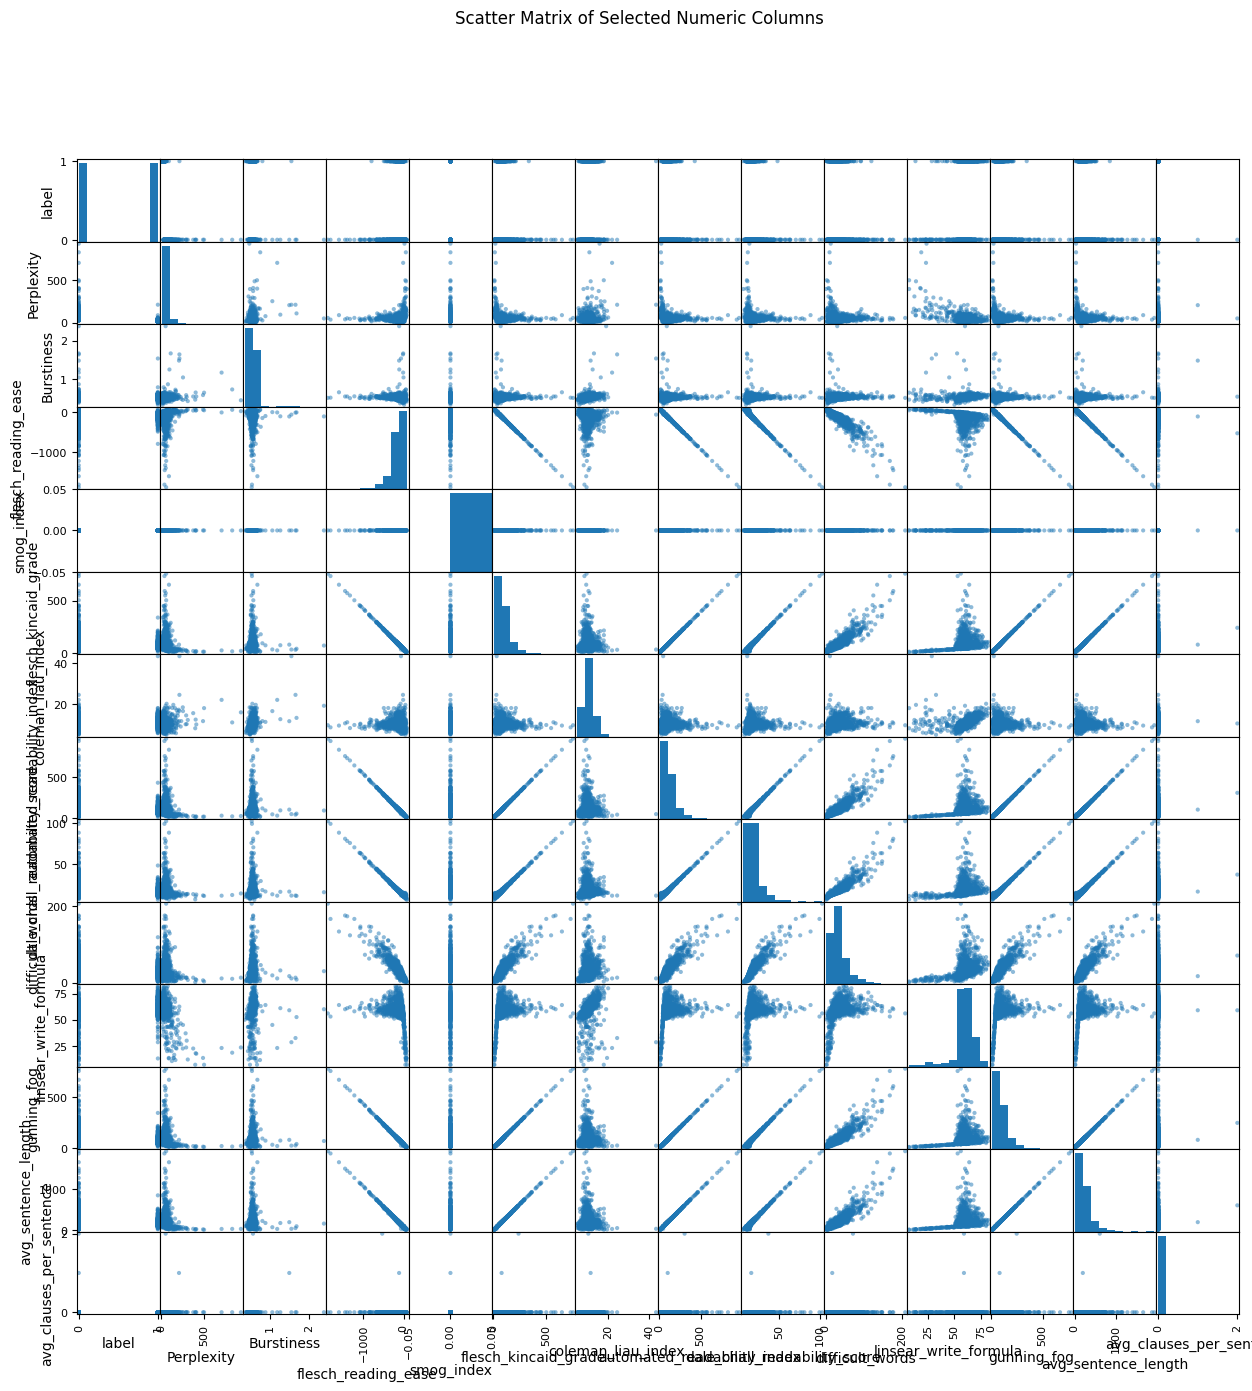

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Assuming perpx_df is your DataFrame
# Calculate the correlation matrix
numeric_columns = perpx_df.select_dtypes(include=[float, int]).columns
correlation_matrix = perpx_df[numeric_columns].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix["label"].sort_values(ascending=False))

# Create scatter plot matrix with histograms on the diagonal
scatter_columns = ['label','Perplexity', 'Burstiness', 'flesch_reading_ease', 'smog_index',
                   'flesch_kincaid_grade', 'coleman_liau_index', 'automated_readability_index',
                   'dale_chall_readability_score', 'difficult_words', 'linsear_write_formula',
                   'gunning_fog', 'avg_sentence_length', 'avg_clauses_per_sentence']

scatter_matrix(perpx_df[scatter_columns], figsize=(15, 15), diagonal='hist')
plt.suptitle('Scatter Matrix of Selected Numeric Columns')
plt.show()

# **Tokenization**

## Loading a Pre-trained GloVe Model Using Pandas

In the provided code snippet, you're loading a pre-trained GloVe (Global Vectors for Word Representation) model from a text file and converting it into a dictionary for easier access. Below is a breakdown of the parameters used in the `read_csv` function from pandas:

### Parameters Explained

- **`sep=" "`**: Specifies the delimiter that separates each field in the dataset. For GloVe files, each line starts with a word followed by its embedding, with each field separated by space.

- **`quoting=3`**: This parameter controls how quote characters are handled during parsing. Here, `3` corresponds to `csv.QUOTE_NONE`, meaning that quote characters in the input data do not signify the start or end of a quoted item. This prevents potential issues as some words might contain quote characters.

- **`header=None`**: Indicates to pandas that the first line in the file does not contain header information. For GloVe files, the first line includes actual data (a word and its corresponding vector), making it crucial to set this parameter to `None`.

- **`index_col=0`**: Sets the first column of the data, which contains the words, as the index of the DataFrame. This configuration facilitates easy access to the vectors by word when transforming the DataFrame into a dictionary.

### Dictionary Conversion

- **`glove_model = {key:value.values for key, value in glove_df.T.items()}`**: This line of code transforms the DataFrame into a dictionary for faster lookup. The DataFrame is transposed (`glove_df.T`) to switch rows and columns. In the transposed DataFrame, each word (now a column) and its vector form key-value pairs. The `.items()` method iterates over these pairs, with `key` being the word and `value.values` extracting the numerical array (embedding vector) associated with the word.

### Summary

This setup is typical for handling word embeddings in natural language processing tasks, where rapid access to the vector representation of words is often required. The resulting dictionary provides an efficient way to manage and utilize the GloVe embeddings for computational tasks in NLP.


In [18]:
unique_df.shape

(45749, 4)

In [19]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Ensure text is a string
    if isinstance(text, str):
        # Tokenize the text into words
        words = text.split()
        # Remove stop words
        filtered_words = [word for word in words if word.lower() not in stop_words]
        # Join words back into a single string
        return " ".join(filtered_words)
    return text

unique_df.loc[:, 'text'] = unique_df['text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

def process_text(text):
    try:
        # Tokenize text and convert to lower case
        words = word_tokenize(text.lower())
        return words
    except TypeError:
        print(f"Warning: Non-string input encountered: {text}")
        return []

# Apply the processing function using .loc for safer operation
#unique_df.loc[:, 'tokenized_text'] = unique_df['text'].apply(process_text)
# Apply the processing function using .loc for safer operation
unique_df.loc[:, 'tokenized_text'] = unique_df['text'].apply(process_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')  # Download the tokenizer model
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stem_text(text):
    words = word_tokenize(text.lower())  # Lowercasing and tokenizing
    stemmed_words = [stemmer.stem(word) for word in words]  # Stemming
    return ' '.join(stemmed_words)

unique_df.loc[:, 'processed_text'] = unique_df['text'].apply(process_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-06-18 23:01:54--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-06-18 23:01:54--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.02MB/s    in 2m 39s  

2024-06-18 23:04:33 (5.17 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflatin

In [ ]:
import numpy as np

def load_glove_model(glove_file):
    print("Loading Glove Model")
    with open(glove_file, 'r', encoding='utf8') as f:
        glove_model = {}
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array([float(val) for val in split_line[1:]])
            glove_model[word] = embedding
        print("Done.", len(glove_model), " words loaded!")
    return glove_model

glove_path = 'glove.6B.300d.txt'
glove_model = load_glove_model(glove_path)

Loading Glove Model
Done. 400000  words loaded!


In [ ]:
unique_df['processed_text']

0        [basically, many, categories, best, seller, re...
1        [salt, good, dying, car, crashes, car, crashes...
2        [way, works, old, tv, stations, got, certain, ...
3        [ca, nt, go, around, assassinating, leaders, c...
4        [wanting, kill, shit, germans, drives, innovat...
                               ...                        
48639    [uncommon, blood, pressure, fluctuate, through...
48640    [several, possible, causes, painless, lump, ri...
48641    [appropriate, recommend, specific, medication,...
48642    [uncommon, people, rheumatoid, arthritis, ra, ...
48643    [uncommon, experience, back, pain, especially,...
Name: processed_text, Length: 45749, dtype: object

In [ ]:
import numpy as np

def tokens_to_vector(tokens, glove_model):
    vector_list = [glove_model[token] for token in tokens if token in glove_model]
    if vector_list:
        # Average the vectors to create a single vector per text
        text_vector = np.mean(vector_list, axis=0)
    else:
        # If no tokens in the text are in the glove_model, return a zero vector
        text_vector = np.zeros(300)  # Adjust the size depending on the GloVe vectors you loaded
    return text_vector

unique_df.loc[:, 'vector_features'] = unique_df['tokenized_text'].apply(lambda x: tokens_to_vector(x, glove_model))

In [ ]:
unique_df['vector_features'].head()

0    [-0.1312311344537815, 0.1357034411764706, 0.04...
1    [-0.062339281865285014, 0.0825920663212435, -0...
2    [-0.2674947338403042, 0.1201015755665399, 0.06...
3    [-0.14290759238095238, 0.0557432177142857, -0....
4    [-0.008924468421052642, 0.060109743609022576, ...
Name: vector_features, dtype: object

In [ ]:
!pip -q install tqdm

In [ ]:
import torch
from tqdm.auto import tqdm
from transformers import GPT2LMHeadModel, GPT2Tokenizer

model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

def calculate_perplexity(text, tokenizer, model, stride=512, max_length=1024):
    # Ensure the text is truncated to the maximum model length
    encodings = tokenizer(text[:max_length], return_tensors='pt')

    nlls = []
    for i in range(0, encodings.input_ids.size(1), stride):
        begin_loc = max(i + stride - max_length, 0)
        end_loc = min(i + stride, encodings.input_ids.size(1))
        trg_len = end_loc - i
        input_ids = encodings.input_ids[:, begin_loc:end_loc]
        target_ids = input_ids.clone()
        target_ids[:, :-trg_len] = -100

        with torch.no_grad():
            outputs = model(input_ids, labels=target_ids)
            log_likelihood = outputs[0] * trg_len

        nlls.append(log_likelihood)

    ppl = torch.exp(torch.stack(nlls).sum() / encodings.input_ids.size(1))
    return ppl.item()

def calculate_perplexities(df, tokenizer, model):
    # Add a new column for perplexity
    df['Perplexity'] = 0
    for i in tqdm(range(len(df)), desc='Calculating Perplexities'):
        df.at[i, 'Perplexity'] = calculate_perplexity(df['text'].iloc[i], tokenizer, model)
    return df

# Assuming `unique_df` is your DataFrame with the texts
unique_df = calculate_perplexities(unique_df, tokenizer, model)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
<ipython-input-34-d76c3622540a>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Perplexity'] = 0


Calculating Perplexities:   0%|          | 0/45749 [00:00<?, ?it/s]

In [ ]:
def calculate_burstiness(text_data):
    lengths = [len(text.split()) for text in text_data]
    mean_length = np.mean(lengths)
    std_dev_length = np.std(lengths)
    burstiness = std_dev_length / mean_length if mean_length > 0 else 0
    return burstiness

# Example usage
texts = ["The quick brown fox", "jumps over the lazy dog", "in a quaint little cafe"]
print("Burstiness:", calculate_burstiness(texts))
unique_df.loc[:, 'Burstiness'] = unique_df['text'].apply(calculate_burstiness)

Burstiness: 0.10101525445522107


In [ ]:
from sklearn.model_selection import train_test_split

y=final_df['label']

X_train, X_test, y_train, y_test = train_test_split(final_df['text'], y, test_size=0.2, random_state=42)